# Abstract
This is an example written in Pyton from the meetup - https://www.meetup.com/Les-nuits-des-reseaux-de-neurones/events/251751287 - of a Deep Neural Network for the classification of three 5 pixels by 5 pixels images.

# Import the different libraries

[NumPy](https://docs.scipy.org/doc/numpy/reference)

[matplotlib](https://matplotlib.org/contents.html)

In [285]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

## Transfer Method
This Python function activates the neuron based on the specified parameter.

In [293]:
def transfer(v):
    # The ReLu method. 
    # It could not make the net to converge to optimal weights during training.
    # return v if v > 1 else 0

    return math.tanh(v)

## Perceptron
The neuron intelligence to compute the activation value based on the initial matrix and the weight.

In [287]:
def perceptron(M, weight):
    # Compute the matrix product i.e. the linear combination of the weight for each pixel.
    # Sum(w(i,j) * M(i,j)) for all i,j in {0,1,2,3,4}
    
    # First reshape the matrix to a vector of size 25, reshape the weight matrix to a 25x1 matrix.
    # Then compute the matrix product and get the result from the 1x1 matrix.
    result = np.dot(np.reshape(M, 25), np.reshape(weight, (25, 1)))[0]
    
    # Compute the transfer (activation) value.
    return transfer(result)

## Weight Update
This function updates the weight using the matrix, the weights for each image of the training set, the learning rate alpha and the labels i.e. the expected values for each image.

In [301]:
def updateweight(M, weights, alpha, label):
    # Compute the approximations using the perceptron and create a matrix.
    approx = np.array([perceptron(M, weights[0]), perceptron(M, weights[1]), perceptron(M, weights[2])])

    # Compute the errors.
    errs = label - approx

    # Update the weights using the errors made on the matrix and the learning rate.
    weights[0] += M * errs[0] * alpha
    weights[1] += M * errs[1] * alpha
    weights[2] += M * errs[2] * alpha

## Net Training function
This function trains the net using the training set made of images A, B and C to set the weights according to the labels.

We also plot the perceptron values for each image as the net learns.

In [302]:
def train(iter_nb, A, B, C, weights, labels):
    alpha = 0.01
    
    # Data for ploting.
    iters = range(iter_nb)
    y = np.empty((3, iter_nb))

    for i in iters:
        # Update the weight on the training set.
        updateweight(A, weights, alpha, labels[0])
        updateweight(B, weights, alpha, labels[1])
        updateweight(C, weights, alpha, labels[2])

        # Plot the perceptron only for one dimension on the weight for A, B and C.
        y[0][i] = perceptron(A, weights[0])
        y[1][i] = perceptron(B, weights[1])
        y[2][i] = perceptron(C, weights[2])
            
    plt.plot(iters, y[0], linestyle='-', color='#FF9859', label='Learning on A')
    plt.plot(iters, y[1], linestyle='-', color='#42AAA5', label='Learning on B')
    plt.plot(iters, y[2], linestyle='-', color='#254044', label='Learning on C')
    plt.ylabel('Perceptron Approximation')
    
    legend = plt.legend(loc='lower right', shadow=True, fontsize='x-large')

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('#E8EAE3')
    
    # Change size of the figure.
#     plt.figure(figsize=(5,8))
    
    plt.show()

## Data
The training set made of image A, B and C is defined. 
The weights matrix is initialized per image with values different from 0s and 1s to avoid getting the training stuck.
The labels are the expected values for each image, we define them arbitrarily.

In [303]:
# Initial matrices of dimension 5 x 5 storing 3 images - A, B and C - depicting data to train on.
A = np.array([[1, 0,0,0,0],
            [0, 1,0,0,0],
            [1, 0,1,0,0],
            [0, 0,0,1,0],
            [0, 0,0,0,1]])

B = np.array([[1, 0,0,0,1],
            [0, 1,0,1,0],
            [1, 0,1,0,0],
            [0, 1,0,1,0],
            [1, 0,0,0,1]])

C = np.array([[0, 0,0,0,1],
            [0, 0,0,1,0],             
            [1, 0,1,0,0],
            [0, 1,0,0,0],
            [1, 0,0,0,0]])

# The initial weights defined randomly for each 5 x 5 images.
# A 5 x 5 image has therefore 25 features that need to be weighted. 
# A 5 x 5 weight matrix is used per image.
weights = np.array([np.random.rand(5,5), np.random.rand(5,5), np.random.rand(5,5)])
print(weights[0])
print(weights[1])
print(weights[2])

# Finally the label for each image A = (1,0,0), B = (0,1,0) and C = (0,0,1).
# The labels have been defined upfront and is the expected value that 
# the Neural Network will try to model as close as possible using the weights.
labels = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1]])

[[0.20571572 0.81991435 0.5222569  0.58945126 0.80042965]
 [0.58811034 0.07911394 0.07637095 0.35371647 0.02373179]
 [0.82383213 0.68096338 0.16383154 0.31901356 0.60686146]
 [0.81977613 0.01135405 0.97782615 0.38512949 0.44319683]
 [0.16755815 0.93567699 0.2060111  0.49677985 0.20891474]]
[[0.14300217 0.87001516 0.46149085 0.13665434 0.70977797]
 [0.33338645 0.26413349 0.26074873 0.01733434 0.50118381]
 [0.27143445 0.85617402 0.42930919 0.04822728 0.39217591]
 [0.74522379 0.76373336 0.96355793 0.17106666 0.6258988 ]
 [0.16596006 0.63806446 0.01721982 0.44531116 0.57342165]]
[[0.47349256 0.88465962 0.25422633 0.79892405 0.46405406]
 [0.79684379 0.2333289  0.56459267 0.40771737 0.94251176]
 [0.96639972 0.06405904 0.67700573 0.97716327 0.21092576]
 [0.43988644 0.45186015 0.08484733 0.67778281 0.02472324]
 [0.59187687 0.87583257 0.86734123 0.27608839 0.63644914]]


## Training the model
The model is trained using the training set, the weights and the labels.
At the end of the run, the weights will be set and it is time to check with the test set how it performs.

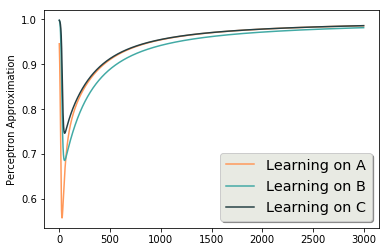

In [304]:
train(3000, A, B, C, weights, labels)

## Testing with A

In [305]:
print("Label:",labels[0])
print("Approx: ", [perceptron(A, weights[0]), perceptron(A, weights[1]), perceptron(A, weights[2])])

Label: [1 0 0]
Approx:  [0.9859788944055374, 0.013916021240294504, -0.009587544769696851]


## Testing with B

In [306]:
print("Label:",labels[1])
print("Approx: ", [perceptron(B, weights[0]), perceptron(B, weights[1]), perceptron(B, weights[2])])

Label: [0 1 0]
Approx:  [0.013384224535022561, 0.9815604030502074, 0.013613073734206857]


## Testing with C

In [307]:
print("Label:",labels[2])
print("Approx: ", [perceptron(C, weights[0]), perceptron(C, weights[1]), perceptron(C, weights[2])])

Label: [0 0 1]
Approx:  [-0.00903383029481281, 0.013078857414579958, 0.9860407774929018]
